# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

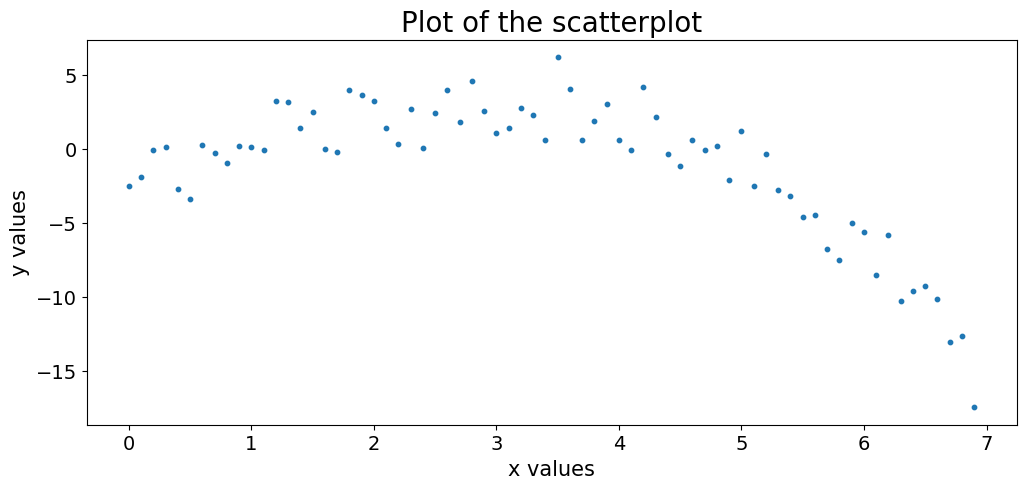

In [20]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

x = xy_data[:,0]  # First column of array (indexed by 0)
y = xy_data[:,1]  # Second column of array (indexed by 1)


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Plot of the scatterplot')
plt.savefig('Ex1a_plot.pdf', bbox_inches = 'tight')
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [30]:
def polyreg(data_matrix, k):
    # Your code here
    x = data_matrix[:,0]
    y = data_matrix[:,1]
    
    X_t = []                # Create empty X matrix and append all the values to the kth order
    if k >= np.size(x):
        for n in range(np.size(x)-2):
            X_t.append(np.zeros(np.size(x))**n)
        X_t.append(x**(np.size(x)-1))
    else:
        for n in range(k+1):
            X_t.append(x**n)
    
    XT = np.array(X_t)
    X = np.transpose(X_t)   # X matrix with N rows and k+1 columns

    # Calculate beta vector and print its coefficients
    beta_vec = np.linalg.inv(XT.dot(X)).dot(XT.dot(y))
    #print("Regression coefficients for polynomial model:")
    #for i in range(k):
        #print("\t beta_"+str(i)+" = "+str(np.round(beta_vec[i], decimals=3)))

    # Compute the SSE, which is SSE = ||y - X*beta||**2:
    SSE = np.linalg.norm(y - X.dot(beta_vec))**2
    #print("SSE of the polynomial model:", np.round(SSE, decimals=3))

    # Compute the vector of residuals:
    resid_vec = y - X.dot(beta_vec)
    #print("Vector of residuals of the polynomial model:")
    #print(np.round(resid_vec, decimals=3))


    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    return(beta_vec, SSE, resid_vec)

polyreg(xy_data, 7)

(array([-1.50819967e+00, -4.65383833e+00,  1.63976258e+01, -1.43491447e+01,
         5.93465370e+00, -1.27571679e+00,  1.36659585e-01, -5.77065743e-03]),
 141.63595476000782,
 array([-1.03863916, -0.10783811,  1.80625881,  1.9092152 , -1.18139679,
        -2.21526252,  1.05612544,  0.13891978, -0.91364449, -0.16354173,
        -0.57017579, -1.04316726,  1.94215925,  1.69170023, -0.26839284,
         0.71014652, -1.94504159, -2.24549379,  1.92628523,  1.52977091,
         1.09861293, -0.72342555, -1.83575449,  0.51613698, -2.17936938,
         0.19289401,  1.71042265, -0.46567583,  2.24930338,  0.18015784,
        -1.36858598, -1.0134965 ,  0.27840635, -0.21721244, -1.92110106,
         3.68618927,  1.59959105, -1.80766931, -0.46422389,  0.83894228,
        -1.43419826, -1.96320023,  2.51623995,  0.79544064, -1.4480558 ,
        -1.91147439,  0.23556152, -0.04041794,  0.66798067, -1.16398567,
         2.62555528, -0.54344942,  2.12588646,  0.19547894,  0.32550111,
        -0.59537296,  

Use the tests below to check the outputs of the function you have written:

In [4]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

Regression coefficients for polynomial model:
	 beta_0 = 2.0
	 beta_1 = -7.0
SSE of the polynomial model: 0.0
Vector of residuals of the polynomial model:
[-0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0.]
Regression coefficients for polynomial model:
SSE of the polynomial model: 397.489
Vector of residuals of the polynomial model:
[ 8.9   7.63  6.42  5.27  4.18  3.15  2.18  1.27  0.42 -0.37 -1.1  -1.77
 -2.38 -2.93 -3.42 -3.85 -4.22 -4.53 -4.78 -4.97 -5.1 ]
Regression coefficients for polynomial model:
SSE of the polynomial model: 397.489
Vector of residuals of the polynomial model:
[ 8.9   7.63  6.42  5.27  4.18  3.15  2.18  1.27  0.42 -0.37 -1.1  -1.77
 -2.38 -2.93 -3.42 -3.85 -4.22 -4.53 -4.78 -4.97 -5.1 ]


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

The SSEs for the polynomial models with k = (2,3,4) are (172.181, 152.406, 151.228) respectively.
The R^2 values for the polynomial models with k = (2,3,4) are (0.888, 0.901, 0.901) respectively.


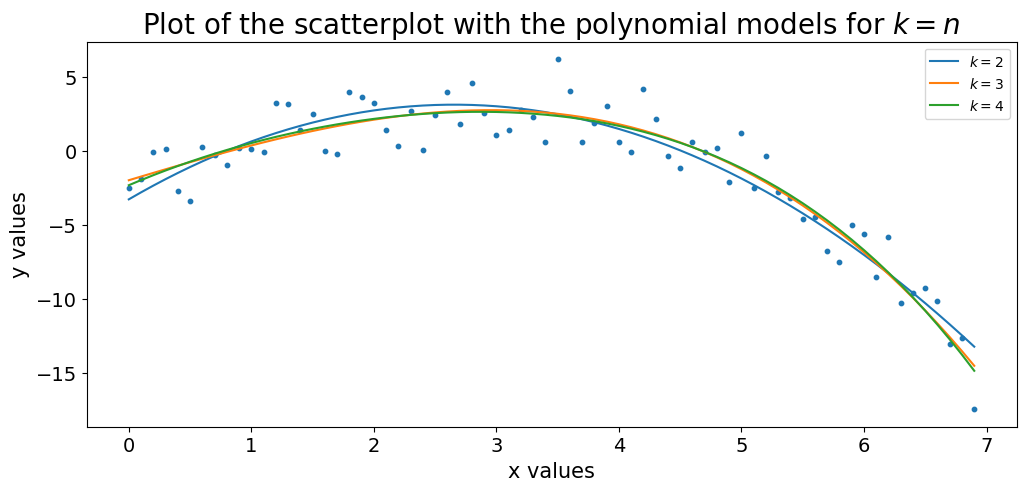

In [39]:
# Points of the data
x = xy_data[:,0]  # First column of array (indexed by 0)
y = xy_data[:,1]  # Second column of array (indexed by 1)

# Plot of the poly model for k = 2, with the same x_coordinates as data
beta_vec_k2 = polyreg(xy_data, 2)[0]
y_k2 = beta_vec_k2[0] + beta_vec_k2[1]*x + beta_vec_k2[2]*x**2

# Poly model for k = 3
beta_vec_k3 = polyreg(xy_data, 3)[0]
y_k3 = beta_vec_k3[0] + beta_vec_k3[1]*x + beta_vec_k3[2]*x**2 + beta_vec_k3[3]*x**3

# Poly model for k = 4
beta_vec_k4 = polyreg(xy_data, 4)[0]
y_k4 = beta_vec_k4[0] + beta_vec_k4[1]*x + beta_vec_k4[2]*x**2 + beta_vec_k4[3]*x**3 + beta_vec_k4[4]*x**4

# SSE for the models and SSE_0
SSE_0 = polyreg(xy_data, 0)[1]
SSE_2 = polyreg(xy_data, 2)[1]
SSE_3 = polyreg(xy_data, 3)[1]
SSE_4 = polyreg(xy_data, 4)[1]

print("The SSEs for the polynomial models with k = (2,3,4) are (" + str(np.round(SSE_2, 3)) + ", " + str(np.round(SSE_3, 3)) + ", " + str(np.round(SSE_4, 3)) + ") respectively.")

# Calculate R^2 values
R_2 = np.round(1-SSE_2/SSE_0, 3)
R_3 = np.round(1-SSE_3/SSE_0, 3)
R_4 = np.round(1-SSE_4/SSE_0, 3)

print("The R^2 values for the polynomial models with k = (2,3,4) are (" + str(R_2) + ", " + str(R_3) + ", " + str(R_4) + ") respectively.")


plt.scatter(x, y, s=10)
plt.plot(x, y_k2, "-", label = "$k = 2$")
plt.plot(x, y_k3, "-", label = "$k = 3$")
plt.plot(x, y_k4, "-", label = "$k = 4$")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Plot of the scatterplot with the polynomial models for $k = n$')
plt.legend()
plt.savefig('Ex1c_plot.pdf', bbox_inches = 'tight')
plt.show()


 #### State which model you choose and briefly justify your choice.
 
 
I would choose the $k=3$ model, as $k=4$ is not much more accurate (the $R^2$ value is only 0.1% higher, and the SSE is not much lower), but has more complexity. It is a nice middle-ground between simplicity and accuracy.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

In [ ]:
#Your code here

